<a href="https://colab.research.google.com/github/cookiesx123/house-price-pred/blob/main/house_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Regression**


Dataset from kaggle: https://www.kaggle.com/datasets/prokshitha/home-value-insights/data

Features:

- Square_Footage: The size of the house in square feet. Larger homes typically have higher prices. [m²]
- Num_Bedrooms: The number of bedrooms in the house. More bedrooms generally increase the value of a home.
- Num_Bathrooms: The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.
- Year_Built: The year the house was built. Older houses may be priced lower due to wear and tear.
- Lot_Size: The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property. [ac]
- Garage_Size: The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.
- Neighborhood_Quality: A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. Better neighborhoods usually command higher prices.
- House_Price (Target Variable): The price of the house, which is the dependent variable you aim to predict [USD]


**Importing necessary libraries**

In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Loading data into DataFrame**


In [3]:
df = pd.read_csv('house_price_regression_dataset.csv')
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
df['House_Price'].describe()

,House_Price
count,1.000000e+03
mean,6.188610e+05
std,2.535681e+05
min,1.116269e+05
25%,4.016482e+05
50%,6.282673e+05
75%,8.271413e+05
max,1.108237e+06


**Cleaning the data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [6]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


We can see that the variables selected for  analysis don't have any nulls, therefore
there is no need to replace any data.

In [7]:
df[df.duplicated()]

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price


In [8]:
df.dtypes

,0
Square_Footage,int64
Num_Bedrooms,int64
Num_Bathrooms,int64
Year_Built,int64
Lot_Size,float64
Garage_Size,int64
Neighborhood_Quality,int64
House_Price,float64


In [9]:
df.describe()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


**Visualizing**

<Figure size 1000x600 with 0 Axes>

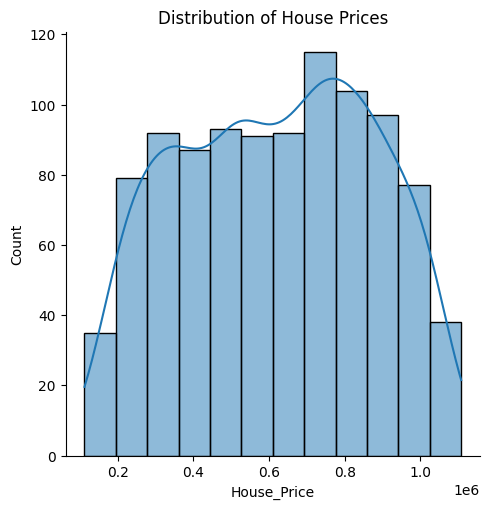

In [16]:
plt.figure(figsize=(10, 6))
sns.displot(df['House_Price'],kde=True)
plt.title('Distribution of House Prices')
plt.show()

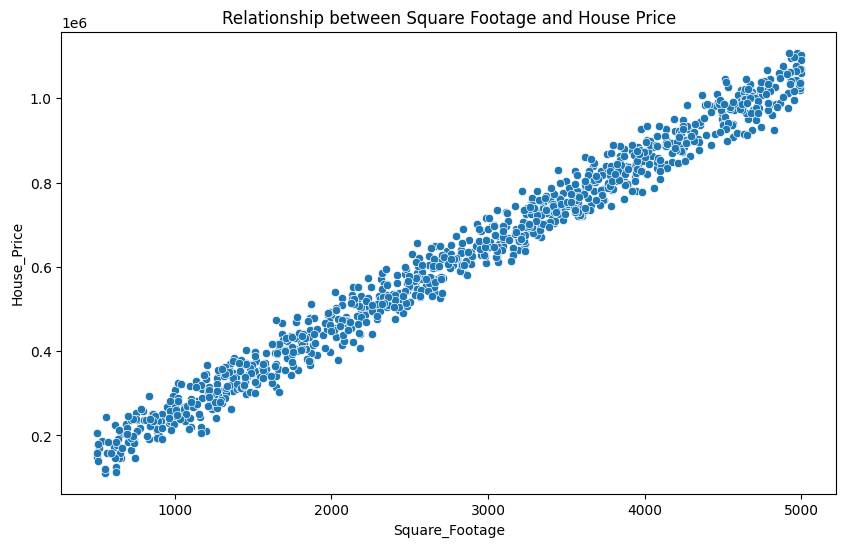

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Square_Footage', y='House_Price', data=df)
plt.title('Relationship between Square Footage and House Price')
plt.show()

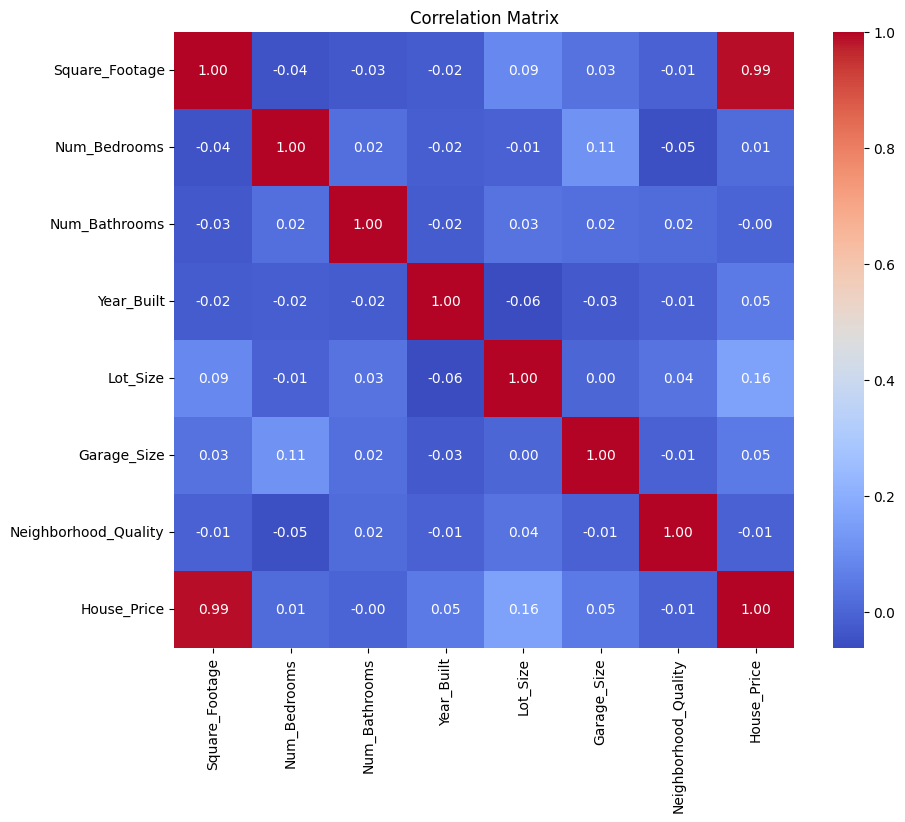

In [18]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")#heatmap
plt.title('Correlation Matrix')
plt.show()

We can see that the correlation between Square footage and House price is almost ideal sitting at 0.99

Building the model

In [19]:
X = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
        'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]

y = df['House_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
521,4012,3,1,2016,2.098092,1,5
737,2310,3,1,1988,1.369622,1,4
740,4708,1,3,1962,1.792970,1,8
660,4932,2,1,1972,4.479598,1,2
411,3646,1,1,1994,3.980987,0,9
...,...,...,...,...,...,...,...
408,3767,5,3,1981,1.520335,2,4
332,616,2,3,1965,3.461372,1,7
208,4491,4,2,1994,3.399155,0,4
613,1858,1,1,1996,4.546672,2,8


Predicting

In [22]:
y_pred=model.predict(X_test)
y_pred

array([ 868687.10747903,  490337.89825447,  945667.12422537,
       1033402.87599247,  776698.77390587,  732444.09335308,
        995051.99156272,  885174.76924362,  796730.53817137,
        931741.09209272,  759486.73376772,  645409.40410205,
        217706.20688729, 1047436.52669427,  536985.283711  ,
        187868.55343105,  456819.02346557,  357933.98497768,
        743138.35721931,  362670.94796792,  775101.05248527,
        478174.42921702,  680966.06345079,  889457.56001471,
        447158.93387226,  396997.78641332,  454334.22026962,
        442837.53540887,  187336.81096629,  491668.18070411,
        279715.81740979,  895941.0005743 ,  783583.19778842,
        352212.91737968,  479313.284656  ,  766612.6601435 ,
        474636.25109508,  572446.37288032,  303449.70619643,
        154599.27036073,  304341.05092125,  299677.00775284,
        508575.91105888,  309977.51725285, 1082131.76994762,
       1011343.63575232,  760359.56460958,  807425.57445877,
       1025548.17009414,

In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9984263636823408

An coefficient of determination (R²) of 0.9984 indicates that  99.8% of the variability in the actual data can be accounted for by the model's predictions.

This is an extremely high R² value, suggesting that the model fits the data very well. However, such a high value can sometimes raise concerns about overfitting, meaning the model might perform exceptionally well on the training data but could struggle with unseen data. Therefore, it's essential to evaluate the model on a test set to ensure it generalizes well.

In [24]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mae

8174.583600008702

A Mean Absolute Error of 8174.58 indicates that, on average, the model's predictions differ from the actual values by 8174.58. Because we are predicting housing prices an error of 8174.58 is considered to be relatively small (prices typically range from tens of thousands to hundreds of thousands).

Cross-validation

In [25]:
from sklearn.model_selection import cross_val_score

model_cross = LinearRegression()
scores = cross_val_score(model_cross, X, y, cv=5, scoring='neg_mean_absolute_error') # 5-fold cross-validation using mae as a metric
mae_scores = -scores
mae_scores

array([7941.38091529, 7675.08731203, 8106.05866873, 7706.44575146,
       7598.86107751])

In [26]:
model_cross = LinearRegression()
r2_scores = cross_val_score(model_cross, X, y, cv=5, scoring='r2') # 5-fold cross-validation using R² as a metric
r2_scores


array([0.99846133, 0.99849083, 0.99849944, 0.99846019, 0.9985438 ])

Both MAE and R² values across the five folds are relatively close to each other, which suggests that the model is performing consistently across different subsets of the data.

**Conclusions:**

- The model provides a strong predictive capability for housing prices, allowing potential buyers, sellers, and real estate agents to make informed decisions.
- The analysis revealed that home size is the most major driver of the price, other factors such as the age of the property didn't play as significant roles, but are still relevant.
- This project can be extended by incorporating additional data, such as economic indicators or future market trends, to further enhance the model’s accuracy.